In [1]:
# Set seed for reproducibility
seed = 42
# Import necessary libraries
import os
# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB5

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense, Rescaling, Resizing, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
import albumentations as A
from tensorflow.keras.utils import Sequence
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
# Configure plot display settings

sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.16.1


In [2]:

original_data_path = "/kaggle/input/bloodcellsss/training_set.npz"
cleaned_data_path  = ["/kaggle/input/cleaneddataset/cleaned_images.npz", "/kaggle/working/cleaned_images.npz"]

found_clean_data = False
for path in cleaned_data_path:
    if os.path.exists(path):
        print(f"Loading data from: {path}")
        data = np.load(path)
        
        images = data['images']
        labels = data['labels']

        found_clean_data = True
        break
        
if found_clean_data == False:
    print(f"Loading data from: {original_data_path}")
    data = np.load(original_data_path)

    images, labels = data['images'], data['labels']
    selected_indices = [13202, 13690]

    # Load pretrained VGG16 model
    vgg_model = VGG16(weights='imagenet')
    feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('fc1').output)

    def preprocess_and_extract_features(images, batch_size=64):
        all_features = []
        for start in range(0, len(images), batch_size):
            batch_images = images[start:start + batch_size]
            processed_images = preprocess_images(batch_images)
            batch_features = feature_extractor.predict(processed_images)
            all_features.append(batch_features)
        return np.vstack(all_features)

    def preprocess_images(images):
        processed_images = []
        for img in images:
            img_resized = cv2.resize(img, (224, 224))
            img_resized = img_to_array(img_resized)
            img_resized = np.expand_dims(img_resized, axis=0)
            img_resized = preprocess_input(img_resized)
            processed_images.append(img_resized)
        return np.vstack(processed_images)

    # Process images in batches to save memory
    features = preprocess_and_extract_features(images)

    # Function to get similar images
    def get_similar_images(indices, threshold=0.8):
        selected_features = features[indices]
        similarities = cosine_similarity(selected_features, features)
        similar_indices = np.where(np.max(similarities, axis=0) >= threshold)[0]
        return similar_indices, similarities

    # Identify similar images
    similar_indices, similarities = get_similar_images(selected_indices, threshold=0.8)

    # Separate datasets
    def resize_back_to_original(images, target_size=(96, 96)):
        resized_images = [cv2.resize(img, target_size) for img in images]
        return np.array(resized_images)

    outlier_images = resize_back_to_original(images[similar_indices])  # Resize back to 96x96
    outlier_labels = labels[similar_indices]

    remaining_indices = np.setdiff1d(np.arange(images.shape[0]), similar_indices)
    images = resize_back_to_original(images[remaining_indices])  # Resize back to 96x96
    labels = labels[remaining_indices]

    print(f"Number of similar images: {outlier_images.shape[0]}")
    print(f"Number of remaining images: {images.shape[0]}")

    # Save the datasets
    np.savez("/kaggle/working/cleaned_images.npz", images=images, labels=labels)

Loading data from: /kaggle/input/bloodcellsss/training_set.npz
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


I0000 00:00:1732483503.778264      99 service.cc:145] XLA service 0x7f28a4003050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732483503.778303      99 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732483503.778307      99 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step


I0000 00:00:1732483517.312350      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

In [3]:
label_list = {0:'Basophil', 1:'Eosinophil', 2:'Erythroblast', 3:'Immature granulocytes', 4:'Lymphocyte', 5:'Monocyte', 6:'Neutrophil', 7:'Platelet'}
# Save unique labels
unique_labels = list(label_list.values())

print("images data shape: ", images.shape)
print("labels data shape: ", labels.shape)

images data shape:  (11959, 96, 96, 3)
labels data shape:  (11959, 1)


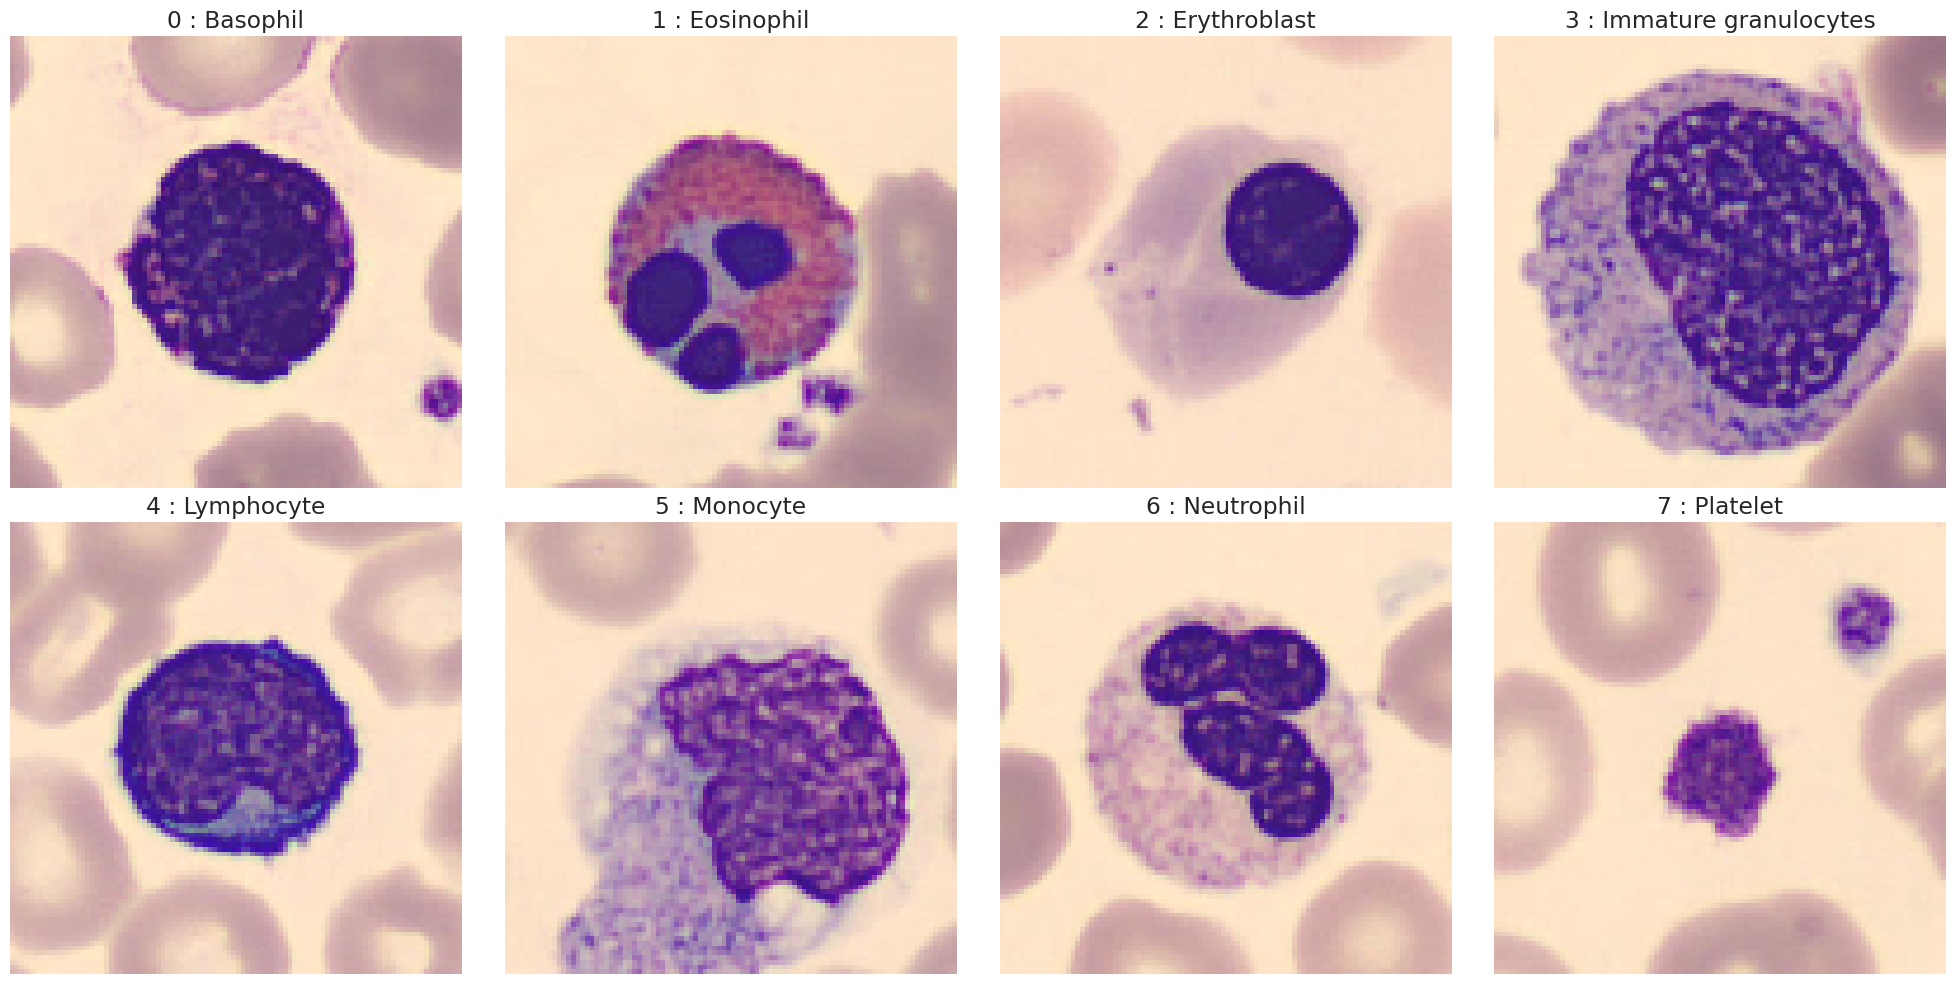

In [4]:
num_classes = 8  # Number of classes
first_indices = []  # To store the first occurrence of each class

# Find the first index of each class
for class_label in range(num_classes):
    for idx, label in enumerate(labels):
        if label == class_label:
            first_indices.append(idx)
            break

# Check if we have found all classes
if len(first_indices) < num_classes:
    raise ValueError("Some classes are missing in the dataset!")

# Plot the first occurrence of each class in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns

for i, idx in enumerate(first_indices):
    row, col = divmod(i, 4)  # Determine the row and column in the grid
    ax = axes[row, col]
    ax.imshow(np.squeeze(images[idx]), vmin=0., vmax=1.)
    ax.set_title(f'{labels[idx][0]} : {label_list[labels[idx][0]]}')
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

Total number of images:  11959
Counting occurrences of target classes:
digit
6    2330
1    2181
3    2026
7    1643
2    1085
5     993
0     852
4     849
Name: count, dtype: int64


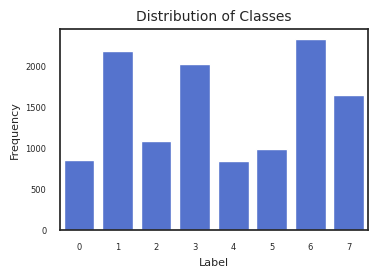

In [5]:
# Inspect the target
print('Total number of images: ', labels.size)
print('Counting occurrences of target classes:')
print(pd.DataFrame(labels, columns=['digit'])['digit'].value_counts())

# Convert labels to a DataFrame for easy counting and plotting
label_df = pd.DataFrame(labels, columns=['digit'])

# Count occurrences of each label
label_counts = label_df['digit'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(4, 3))
sns.barplot(x=label_counts.index, y=label_counts.values, color='#4169E1')  # Same color for all bars

# Set labels and title with reduced font size
plt.xlabel('Label', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.title('Distribution of Classes', fontsize=10)

# Reduce tick label font size
plt.tick_params(axis='both', labelsize=6)

# Show the plot
plt.tight_layout()
plt.show()


In [6]:

# Define an advanced augmentation pipeline (unchanged)
augmentation_pipeline = A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=20, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    # A.CoarseDropout(max_holes=8, max_height=8, max_width=8, min_holes=1, min_height=4, min_width=4, p=0.5)
])

# Define the AugmentedDataGenerator class (unchanged)
class AugmentedDataGenerator(Sequence):
    def __init__(self, images, labels, batch_size=32, augment=True):
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.augment = augment
        self.indices = np.arange(len(images))
    def __len__(self):
        return int(np.ceil(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = [self.images[i] for i in batch_indices]
        batch_labels = [self.labels[i] for i in batch_indices]

        if self.augment:
            batch_images = [augmentation_pipeline(image=image)["image"] for image in batch_images]

        batch_images = np.array(batch_images, dtype="float32")
        batch_labels = np.array(batch_labels)
        return batch_images, batch_labels

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

# Set up target counts for each class
target_class_counts = {4: 1500, 0:1500, 2:1500, 5:1500}  # Example: Adjust target counts as needed

# Initialize augmented images and labels
augmented_images = []
augmented_labels = []

# Process each class specified in the target counts
for target_class, target_count in target_class_counts.items():
    # Find indices and count for the current class
    class_indices = np.where(labels == target_class)[0]
    num_class_images = len(class_indices)
    augmentation_needed = max(0, target_count - num_class_images)

    # Skip if no augmentation is needed
    if augmentation_needed == 0:
        continue

    # Select class images and labels
    class_images = images[class_indices]
    class_labels = labels[class_indices]

    # Initialize the generator for the current class
    generator = AugmentedDataGenerator(class_images, class_labels, batch_size=32, augment=True)

    # Generate augmented data for the current class
    class_augmented_images = []
    class_augmented_labels = []
    for batch_images, batch_labels in generator:
        class_augmented_images.extend(batch_images)
        class_augmented_labels.extend(batch_labels)

        if len(class_augmented_images) >= augmentation_needed:
            class_augmented_images = class_augmented_images[:augmentation_needed]
            class_augmented_labels = class_augmented_labels[:augmentation_needed]
            break

    # Add to the global augmented dataset
    augmented_images.extend(class_augmented_images)
    augmented_labels.extend(class_augmented_labels)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels).reshape(-1, 1)

# Combine the original images and labels with the augmented ones
final_images = np.concatenate((images, augmented_images), axis=0)
final_labels = np.concatenate((labels.reshape(-1, 1), augmented_labels), axis=0)

# Print final data shape and distribution
print("Final images shape:", final_images.shape)
print("Final labels shape:", final_labels.shape)
print("New label distribution after augmentation:\n", Counter(labels.flatten()))
print("New label distribution after augmentation:\n", Counter(final_labels.flatten()))

Final images shape: (14180, 96, 96, 3)
Final labels shape: (14180, 1)
New label distribution after augmentation:
 Counter({6: 2330, 1: 2181, 3: 2026, 7: 1643, 2: 1085, 5: 993, 0: 852, 4: 849})
New label distribution after augmentation:
 Counter({6: 2330, 1: 2181, 3: 2026, 7: 1643, 2: 1500, 5: 1500, 0: 1500, 4: 1500})


Total number of images:  14180
Counting occurrences of target classes:
digit
6    2330
1    2181
3    2026
7    1643
2    1500
5    1500
0    1500
4    1500
Name: count, dtype: int64


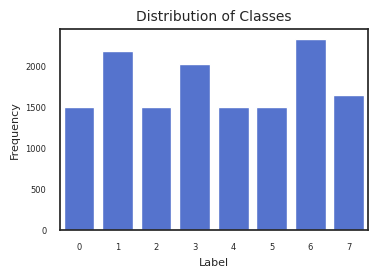

In [7]:
# Inspect the target
print('Total number of images: ', final_labels.size)
print('Counting occurrences of target classes:')
print(pd.DataFrame(final_labels, columns=['digit'])['digit'].value_counts())

# Convert labels to a DataFrame for easy counting and plotting
label_df = pd.DataFrame(final_labels, columns=['digit'])

# Count occurrences of each label
label_counts = label_df['digit'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(4, 3))
sns.barplot(x=label_counts.index, y=label_counts.values, color='#4169E1')  # Same color for all bars

# Set labels and title with reduced font size
plt.xlabel('Label', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.title('Distribution of Classes', fontsize=10)

# Reduce tick label font size
plt.tick_params(axis='both', labelsize=6)

# Show the plot
plt.tight_layout()
plt.show()

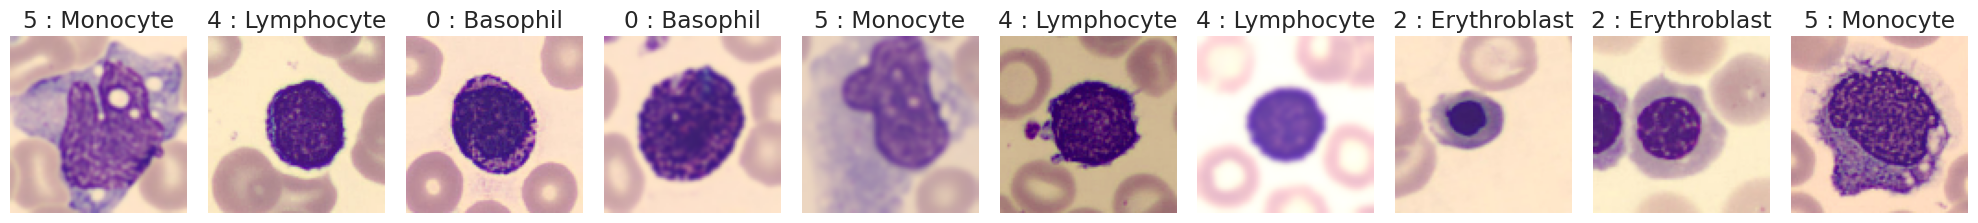

In [8]:
# Display a random sample of images from the augmented dataset
num_img = 10
random_indices = random.sample(range(len(augmented_images)), num_img)
fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected images
for i, idx in enumerate(random_indices):
    ax = axes[i]
    # Remove `np.squeeze` and `vmin`, `vmax` if pixel values are [0, 255]
    ax.imshow(np.squeeze(images[idx]), vmin=0., vmax=1.)
    ax.imshow(augmented_images[idx].astype('uint8'))  # Ensure uint8 for display
    ax.set_title(f'{augmented_labels[idx][0]} : {label_list[augmented_labels[idx][0]]}')
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

In [9]:
offline_augmented_data = True

if offline_augmented_data == True:
    X_set = (final_images / 255.0).astype('float32')
    y_set = tfk.utils.to_categorical(final_labels)

else:
    X_set = (images / 255.0).astype('float32')
    y_set = tfk.utils.to_categorical(labels)


# Split data: 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X_set, y_set, test_size=0.2, stratify=y_set, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=np.argmax(y_temp, axis=1), random_state=42)

# Print the shapes of the resulting datasets
print("Training Data Shape:", X_train.shape)
print("Training Label Shape:", y_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Validation Label Shape:", y_val.shape)
print("Test Data Shape:", X_test.shape)
print("Test Label Shape:", y_test.shape)

Training Data Shape: (11344, 96, 96, 3)
Training Label Shape: (11344, 8)
Validation Data Shape: (1418, 96, 96, 3)
Validation Label Shape: (1418, 8)
Test Data Shape: (1418, 96, 96, 3)
Test Label Shape: (1418, 8)


In [10]:
# Input shape for the model
input_shape = X_train.shape[1:]

# Output shape for the model
output_shape = y_train.shape[1]

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (96, 96, 3)
Output Shape: 8


In [11]:
# Number of training epochs
epochs = 100

# Batch size for training
batch_size = 128


# Print the defined parameters
print("Epochs:", epochs)
print("Batch Size:", batch_size)

Epochs: 100
Batch Size: 128


In [12]:
# Define the patience value for early stopping
patience = 20

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

# Store the callback in a list
callbacks = [early_stopping]

In [13]:
def build_transfer_learning_model(hp):
    
    # Set random seed for reproducibility
    tf.random.set_seed(seed)
    # Input layer
    inputs = Input(shape=(96,96,3), name='Input')
    

    # Resizing layer to match InceptionV3 input requirements
    resized_inputs = Resizing(224, 224, name='Resizing')(inputs)
    print(resized_inputs.shape)

    # Load InceptionV3 as the base model with pretrained weights
    base_model = MobileNetV2(
        include_top=False,  # Exclude the top (fully connected layers)
        weights='imagenet',  # Use pretrained weights from ImageNet
        input_tensor=resized_inputs  # Use resized inputs
    )
    
    # Freeze all layers in the base model
    base_model.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D(name='global_avg_pool')(x)
    
    for i in range(hp.Int('num of layers',1,4)):
        x = Dense(units=hp.Int('units'+str(i),min_value=64,max_value=1024,step=256),activation='relu')(x)
        if hp.Boolean(f'use_batchnorm_{i}'):  # Optional batch normalization
            x = BatchNormalization(name=f'batch_norm_{i}')(x)
        # Add Dropout layer
        x = Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.2), name=f'dropout_{i}')(x)
    
    # Output layer for classification
    outputs = Dense(units=8, activation='softmax', name='output')(x)
    
    # Create the model
    model = Model(inputs=inputs, outputs=outputs, name='InceptionV3_TransferLearning')

    # Compile the model
    loss = CategoricalCrossentropy()
    optimizer = Adam(hp.Choice('learning_rate', values = [ 1e-3, 1e-4]))
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model

In [ ]:
import keras_tuner as kt
# initialize tuner to run the model.
# using the Hyperband search algorithm
tuner = kt.Hyperband(
    build_transfer_learning_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    hyperband_iterations=1,
    directory="Keras_tuner_dir",
    project_name="Keras_tuner_Demo")
# Run the search
tuner.search(X_train, y_train,
             validation_data= (X_val,y_val),
             epochs=30,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Trial 60 Complete [00h 01m 09s]
val_accuracy: 0.9308885931968689

Best val_accuracy So Far: 0.9534555673599243
Total elapsed time: 00h 58m 24s

Search: Running Trial #61

Value             |Best Value So Far |Hyperparameter
1                 |2                 |num of layers
576               |832               |units0
True              |True              |use_batchnorm_0
0.5               |0.3               |dropout_rate_0
0.001             |0.0001            |learning_rate
320               |320               |units1
True              |True              |use_batchnorm_1
0.3               |0.1               |dropout_rate_1
832               |832               |units2
False             |True              |use_batchnorm_2
0.5               |0.1               |dropout_rate_2
576               |64                |units3
False             |False             |use_batchnorm_3
0.3               |0.1               |dropout_rate_3
320               |320               |units4
False             |

In [ ]:
# Get the optimal hyperparameters
best_hps= tuner.get_best_hyperparameters(1)[0]

tuner.results_summary()

# get the best model
best_model = tuner.get_best_models(1)[0]

In [ ]:
# Build the transfer learning model
model = tuner.hypermodel.build(best_hps)

# Print the model summary
model.summary()

In [ ]:
# Train the model with early stopping callback
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
).history


# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'CIFAR10tt_CNN_'+str(final_val_accuracy)+'.keras'
model.save(model_filename)

# Delete the model to free up resources
#del model

In [ ]:
! ls

In [ ]:
# TODO:
# 1. load the model from the previous step
# 2. show the layers and their trainability
# 3. train the model

In [ ]:



# Display a summary of the model architecture
model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 60 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-30:]:
        if not isinstance(layer, tfk.layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

unfreeze_model(model)

In [ ]:
# 2. show the layers and their trainability
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
# Train the model
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
).history


# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'CIFAR10_CNN_'+str(final_val_accuracy)+'.keras'
model.save(model_filename)

# Delete the model to free up resources
#del ft_model

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)
plt.savefig('loss_plot.png', format='png', dpi=300)  # Save the plot as a PNG file

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.savefig('accuracy_plot.png', format='png', dpi=300)  # Save the plot as a PNG file

plt.show()  # Display the plots

In [ ]:
! ls

In [ ]:
# Load the saved model
model = tfk.models.load_model('CIFAR10_CNN_97.53.keras')

In [ ]:
# Predict labels for the entire test set
predictions = model.predict(X_test, verbose=0)

# Display the shape of the predictions
print("Predictions Shape:", predictions.shape)

In [ ]:
# Convert predictions to class labels
pred_classes = np.argmax(predictions, axis=-1)

# Extract ground truth classes
true_classes = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
accuracy = accuracy_score(true_classes, pred_classes)
print(f'Accuracy score over the test set: {round(accuracy, 4)}')

# Calculate and display test set precision
precision = precision_score(true_classes, pred_classes, average='weighted')
print(f'Precision score over the test set: {round(precision, 4)}')

# Calculate and display test set recall
recall = recall_score(true_classes, pred_classes, average='weighted')
print(f'Recall score over the test set: {round(recall, 4)}')

# Calculate and display test set F1 score
f1 = f1_score(true_classes, pred_classes, average='weighted')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Combine numbers and percentages into a single string for annotation
annot = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm.T, annot=annot, fmt='', xticklabels=list(label_list.values()), yticklabels=list(label_list.values()), cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:


model.save('weights.keras')
# del model

In [ ]:
%%writefile model.py

import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.
        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')


    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        X_resized = (X_resized / 255.0).astype('float32')
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

In [ ]:
from datetime import datetime

# Generate a timestamped filename
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Create a zip file with the specified files
!zip -r /kaggle/working/{filename} model.py weights.keras